# 해당 주식에 대한 뉴스 데이터 불러오기

In [4]:
import datetime
today = datetime.datetime.now().strftime("%Y-%m-%d") # 오늘 날짜 YYYY-mm-dd
df = pd.read_csv(f'/home/alpaco/mys/projects/news/datas/{today}/en_nvidia_news.csv')
df

,page,url,date,title,content
0,1,https://investing.com/news/economy-news/future...,2024-07-08,S&P 500 and Nasdaq notch record highs; chipmak...,By Noel Randewich and Ankika Biswas (Reuters) ...
1,1,https://investing.com/news/stock-market-news/n...,2024-07-08,NVIDIA target raised at Wolfe Research on posi...,Wolfe Research raised their price target for N...
2,1,https://investing.com/news/stock-market-news/v...,2024-07-08,"Vistra, Constellation Energy surge on clean en...",By Medha Singh and Seher Dareen (Reuters) - Nu...
3,1,https://investing.com/news/stock-market-news/d...,2024-07-08,Does the AI Boom Parallel the Dotcom Bubble?,It’s safe to say that Wall Street has jumped o...
4,1,https://investing.com/news/stock-market-news/n...,2024-07-08,NVIDIA target lifted at UBS as supply checks c...,Analysts at UBS raised their price target for ...
...,...,...,...,...,...
827,100,https://investing.com/news/stock-market-news/s...,2024-03-13,Stock Market Today: Dow ekes out gain as energ...,Investing.com -- The Dow eked out a gain Wedne...
828,100,https://investing.com/news/stock-market-news/n...,2024-03-13,Nvidia stock could hit $2700 if it follows Cis...,"In 2024, Nvidia (NASDAQ:NVDA)'s relentless mar..."
829,100,https://investing.com/news/stock-market-news/t...,2024-03-13,Together AI valued at $1.25 billion in Salesfo...,By Jaspreet Singh and Krystal Hu (Reuters) -Nv...
830,100,https://investing.com/news/stock-market-news/c...,2024-03-13,Can I invest in Palworld maker Pocketpair?,"The interest in Palworld, a multiplayer, open-..."


# 뉴스 데이터 감성 분석

In [5]:
# 허깅페이스 모델 불러오는 라이브러리
from transformers import pipeline

# 금융관련 문장 감성 분석 모델 불러오기. (sota)
senti_model = pipeline(model='ProsusAI/finbert', truncation='longest_first') # 글은 보통 기승전결 형태로 작성되기 때문에 길이가 초과되면 앞부분 부터 자르도록 설정.

# transformers 라이브러리에서 pipeline 함수를 사용할 때, 입력 텍스트의 길이가 모델이 처리할 수 있는 최대 길이를 초과하면 자동으로 텍스트를 자릅니다. 
# truncation 인자는 입력 텍스트를 모델이 처리할 수 있는 최대 길이로 자르는 방식을 지정하는 옵션입니다.
# truncation 옵션은 다음과 같습니다:
# 'longest_first': 입력 텍스트를 최대 길이로 자르되, 앞부분부터 잘라나간다.
# 'only_first': 입력 텍스트의 첫 번째 부분만 사용한다.
# 'only_second': 입력 텍스트의 두 번째 부분만 사용한다.
# 'do_not_truncate': 입력 텍스트를 자르지 않고 그대로 사용한다.
# 일반적으로 BERT 계열 모델의 최대 길이는 512로 설정되어 있습니다.

# 모델의 인자값은 리스트 값을 받도록 설계되어 있음.
titles = df['title'].tolist() # 데이터 프레임에서 기사 제목을 리스트로 전환
contents = df['content'].tolist() # 데이터 프레임에서 기사 내용을 리스트로 전환

# 기사 제목, 내용 감성 분석
# 값은 리스트로 반환되고 리스트의 요소는 기사마다 {label: '감성' , 'score' : 점수} 로 나타납니다.
title_eval = senti_model(titles)
content_eval = senti_model(contents) 

/home/alpaco/anaconda3/envs/moon_mys/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
display(title_eval[0:10])
display(content_eval[0:10])

[{'label': 'positive', 'score': 0.7695711255073547},
 {'label': 'positive', 'score': 0.8996593356132507},
 {'label': 'neutral', 'score': 0.6723592281341553},
 {'label': 'neutral', 'score': 0.8359887599945068},
 {'label': 'positive', 'score': 0.8565101623535156},
 {'label': 'negative', 'score': 0.9585596919059753},
 {'label': 'negative', 'score': 0.9647375345230103},
 {'label': 'neutral', 'score': 0.9317194223403931},
 {'label': 'neutral', 'score': 0.6554121375083923},
 {'label': 'neutral', 'score': 0.8636879324913025}]

[{'label': 'positive', 'score': 0.8900825381278992},
 {'label': 'positive', 'score': 0.956612765789032},
 {'label': 'positive', 'score': 0.930700957775116},
 {'label': 'neutral', 'score': 0.7667398452758789},
 {'label': 'positive', 'score': 0.9533333778381348},
 {'label': 'negative', 'score': 0.9507313370704651},
 {'label': 'negative', 'score': 0.517713725566864},
 {'label': 'negative', 'score': 0.8362549543380737},
 {'label': 'negative', 'score': 0.9359533190727234},
 {'label': 'positive', 'score': 0.8934890031814575}]

In [7]:
# 리스트로 반환 되었으니 다시 dataframe으로 전환
title_eval_df = pd.DataFrame(title_eval)
content_eval_df = pd.DataFrame(content_eval)

# 뉴스 데이터 프레임과 감성 평가 데이터프레임 합치기

In [8]:
# senti_df = 뉴스 데이터 프레임 + 뉴스 감성 평가 데이터 프레임
senti_df = pd.DataFrame(data={
    'date' : df['date'],
    'title' : df['title'],
    'title_senti' : title_eval_df['label'],
    'title_senti_score' : title_eval_df['score'],
    'content' : df['content'],
    'content_senti' : content_eval_df['label'],
    'content_senti_score' : content_eval_df['score'],
})

In [9]:
senti_df.info() # senti_df = 뉴스 데이터 프레임 + 뉴스 감성 평가 데이터 프레임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 832 non-null    object 
 1   title                832 non-null    object 
 2   title_senti          832 non-null    object 
 3   title_senti_score    832 non-null    float64
 4   content              832 non-null    object 
 5   content_senti        832 non-null    object 
 6   content_senti_score  832 non-null    float64
dtypes: float64(2), object(5)
memory usage: 45.6+ KB


In [10]:
# date 컬럼의 값을 object 타입에서 date 타입으로 수정합니다.
senti_df['date'] = pd.to_datetime(senti_df['date'])

# 수정된 date 컬럼의 값으로 내림차순 정렬하고 인덱스도 재정의 합니다.
senti_df = senti_df.sort_values(by='date', ascending=False).reset_index(drop=True)
senti_df[0:10]

,date,title,title_senti,title_senti_score,content,content_senti,content_senti_score
0,2024-07-08,S&P 500 and Nasdaq notch record highs; chipmak...,positive,0.769571,By Noel Randewich and Ankika Biswas (Reuters) ...,positive,0.890083
1,2024-07-08,"Vistra, Constellation Energy surge on clean en...",neutral,0.672359,By Medha Singh and Seher Dareen (Reuters) - Nu...,positive,0.930701
2,2024-07-08,Does the AI Boom Parallel the Dotcom Bubble?,neutral,0.835989,It’s safe to say that Wall Street has jumped o...,neutral,0.766740
3,2024-07-08,NVIDIA target lifted at UBS as supply checks c...,positive,0.856510,Analysts at UBS raised their price target for ...,positive,0.953333
4,2024-07-08,NVIDIA target raised at Wolfe Research on posi...,positive,0.899659,Wolfe Research raised their price target for N...,positive,0.956613
5,2024-07-07,5 big analyst AI moves: Nvidia downgraded on ‘...,negative,0.958560,Investing.com -- Here are the biggest analyst ...,negative,0.950731
6,2024-07-07,Street Calls of the Week: Nvidia gets a rare d...,negative,0.964738,Here is your Pro Recap of the top takeaways fr...,negative,0.517714
7,2024-07-07,Here are some of the major themes to watch out...,neutral,0.931719,Investing.com -- The first half of 2024 was ma...,negative,0.836255
8,2024-07-07,Two risks to the AI tech rally,neutral,0.655412,Yardeni Research analysts have raised concerns...,negative,0.935953
9,2024-07-06,UBS: 3 investment lessons from the first half,neutral,0.863688,UBS analysts reflect on the first half of 2024...,positive,0.893489


In [11]:
import warnings
warnings.filterwarnings(action='ignore')

senti_df_fixIndex = senti_df.set_index('date') #시계열 데이터 분석이므로 인덱스를 date로 전환한다.
senti_df_fixIndex

,title,title_senti,title_senti_score,content,content_senti,content_senti_score
date,,,,,,
2024-07-08,S&P 500 and Nasdaq notch record highs; chipmak...,positive,0.769571,By Noel Randewich and Ankika Biswas (Reuters) ...,positive,0.890083
2024-07-08,"Vistra, Constellation Energy surge on clean en...",neutral,0.672359,By Medha Singh and Seher Dareen (Reuters) - Nu...,positive,0.930701
2024-07-08,Does the AI Boom Parallel the Dotcom Bubble?,neutral,0.835989,It’s safe to say that Wall Street has jumped o...,neutral,0.766740
2024-07-08,NVIDIA target lifted at UBS as supply checks c...,positive,0.856510,Analysts at UBS raised their price target for ...,positive,0.953333
2024-07-08,NVIDIA target raised at Wolfe Research on posi...,positive,0.899659,Wolfe Research raised their price target for N...,positive,0.956613
...,...,...,...,...,...,...
2024-03-13,Stock Market Today: Dow ekes out gain as energ...,positive,0.813627,Investing.com -- The Dow eked out a gain Wedne...,negative,0.962797
2024-03-13,Nvidia stock could hit $2700 if it follows Cis...,neutral,0.741630,"In 2024, Nvidia (NASDAQ:NVDA)'s relentless mar...",positive,0.592459
2024-03-13,Together AI valued at $1.25 billion in Salesfo...,neutral,0.859806,By Jaspreet Singh and Krystal Hu (Reuters) -Nv...,positive,0.625951


In [12]:
filename = ['kr_','en_'] # 0: 한국 , 1: 미국

# 오늘 날짜에 맞게 디렉터리 생성
today = datetime.datetime.now().strftime("%Y-%m-%d")
save_path = f"./datas/{today}/{filename[1]}nvidia_senti_df.csv"

# 디렉터리 생성
import os
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# CSV 파일로 저장
senti_df_fixIndex.to_csv(save_path, index_label="index")

# 뉴스 제목, 내용 감성평가 차이 시각화

같은 기사지만 제목과 내용은 텍스트가 다르기 때문에 평가가 다를 수 있다.

만약 평가가 매우 상반되면 신뢰할 수 없는 모델이기 때문에 검토가 필요하다.

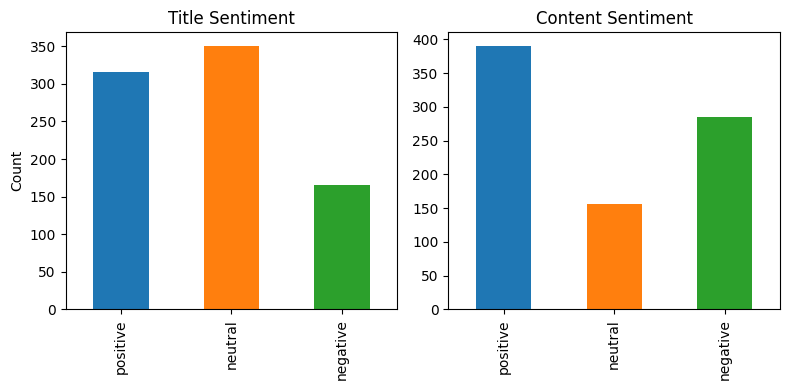

In [13]:
title_senti_counts = senti_df_fixIndex['title_senti'].value_counts() # title_senti 컬럼의 value 값 카운팅 해서 시리즈로 반환합니다.
title_senti_counts = title_senti_counts.sort_index(ascending=False) #시리즈 출력 순서를 positive, neutral, negative로 바꿉니다.
content_senti_counts = senti_df_fixIndex['content_senti'].value_counts()
content_senti_counts = content_senti_counts.sort_index(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(8, 4))

# title_senti 시각화
ax1 = plt.subplot(1, 2, 1) # 그래프 위치 1행 2열 중 1열
title_senti_counts.plot(kind='bar', ax=ax1, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_title('Title Sentiment')
ax1.set_xlabel('')
ax1.set_ylabel('Count')

# content_senti 시각화
ax2 = plt.subplot(1, 2, 2) # 그래프 위치 1행 2열 중 1열
content_senti_counts.plot(kind='bar', ax=ax2, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_title('Content Sentiment')
ax2.set_xlabel('')
ax2.set_ylabel('')
    
# 전체 레이아웃 조정
plt.tight_layout()
plt.show()


# 타이틀, 컨텐츠 감성평가 앙상블

title에 대한 분류가 중립 감성(neutral) 비중이 높은 것을 보아 title 만으로 감성을 분류할 수 없는 케이스가 있고, 

content까지 확인했을 때 더 정확히 분류된다는 것을 확인할 수 있습니다.

따라서 title과 content 분류 결과를 모두 활용해 새로운 감성 score 값을 만들 것입니다.

In [14]:
# 감성 종합 평가를 하기 위해 감성라벨 정수인코딩

def replace_sentiment_scores(df, *columns): # 데이터프레임과 컬럼들을 넣으면 해당 컬럼들의 값들을 수정해주는 함수.
    for col in columns:
        df[col] = df[col].apply(lambda x: 3 if x == 'positive' else 2 if x == 'neutral' else 1)
    return df

senti_df_fixIndex = replace_sentiment_scores(senti_df_fixIndex, 'title_senti', 'content_senti')

print(senti_df_fixIndex['title_senti'].value_counts())
print(senti_df_fixIndex['content_senti'].value_counts())

title_senti
2    351
3    316
1    165
Name: count, dtype: int64
content_senti
3    391
1    285
2    156
Name: count, dtype: int64


In [15]:
senti_df_fixIndex

,title,title_senti,title_senti_score,content,content_senti,content_senti_score
date,,,,,,
2024-07-08,S&P 500 and Nasdaq notch record highs; chipmak...,3,0.769571,By Noel Randewich and Ankika Biswas (Reuters) ...,3,0.890083
2024-07-08,"Vistra, Constellation Energy surge on clean en...",2,0.672359,By Medha Singh and Seher Dareen (Reuters) - Nu...,3,0.930701
2024-07-08,Does the AI Boom Parallel the Dotcom Bubble?,2,0.835989,It’s safe to say that Wall Street has jumped o...,2,0.766740
2024-07-08,NVIDIA target lifted at UBS as supply checks c...,3,0.856510,Analysts at UBS raised their price target for ...,3,0.953333
2024-07-08,NVIDIA target raised at Wolfe Research on posi...,3,0.899659,Wolfe Research raised their price target for N...,3,0.956613
...,...,...,...,...,...,...
2024-03-13,Stock Market Today: Dow ekes out gain as energ...,3,0.813627,Investing.com -- The Dow eked out a gain Wedne...,1,0.962797
2024-03-13,Nvidia stock could hit $2700 if it follows Cis...,2,0.741630,"In 2024, Nvidia (NASDAQ:NVDA)'s relentless mar...",3,0.592459
2024-03-13,Together AI valued at $1.25 billion in Salesfo...,2,0.859806,By Jaspreet Singh and Krystal Hu (Reuters) -Nv...,3,0.625951


In [16]:
# 정수인코딩 한 감성라벨과 감성점수로 새로운 감성평가 값 생성
# 1에 가까우면 부정
# 2에 가까우면 평범
# 3에 가까우면 긍정
senti_df_fixIndex['total_score'] = (senti_df_fixIndex['title_senti'] * senti_df_fixIndex['title_senti_score']) + (senti_df_fixIndex['content_senti'] * senti_df_fixIndex['content_senti_score'])
senti_df_fixIndex['total_score'] /= 2
senti_df_fixIndex

,title,title_senti,title_senti_score,content,content_senti,content_senti_score,total_score
date,,,,,,,
2024-07-08,S&P 500 and Nasdaq notch record highs; chipmak...,3,0.769571,By Noel Randewich and Ankika Biswas (Reuters) ...,3,0.890083,2.489480
2024-07-08,"Vistra, Constellation Energy surge on clean en...",2,0.672359,By Medha Singh and Seher Dareen (Reuters) - Nu...,3,0.930701,2.068411
2024-07-08,Does the AI Boom Parallel the Dotcom Bubble?,2,0.835989,It’s safe to say that Wall Street has jumped o...,2,0.766740,1.602729
2024-07-08,NVIDIA target lifted at UBS as supply checks c...,3,0.856510,Analysts at UBS raised their price target for ...,3,0.953333,2.714765
2024-07-08,NVIDIA target raised at Wolfe Research on posi...,3,0.899659,Wolfe Research raised their price target for N...,3,0.956613,2.784408
...,...,...,...,...,...,...,...
2024-03-13,Stock Market Today: Dow ekes out gain as energ...,3,0.813627,Investing.com -- The Dow eked out a gain Wedne...,1,0.962797,1.701839
2024-03-13,Nvidia stock could hit $2700 if it follows Cis...,2,0.741630,"In 2024, Nvidia (NASDAQ:NVDA)'s relentless mar...",3,0.592459,1.630318
2024-03-13,Together AI valued at $1.25 billion in Salesfo...,2,0.859806,By Jaspreet Singh and Krystal Hu (Reuters) -Nv...,3,0.625951,1.798732


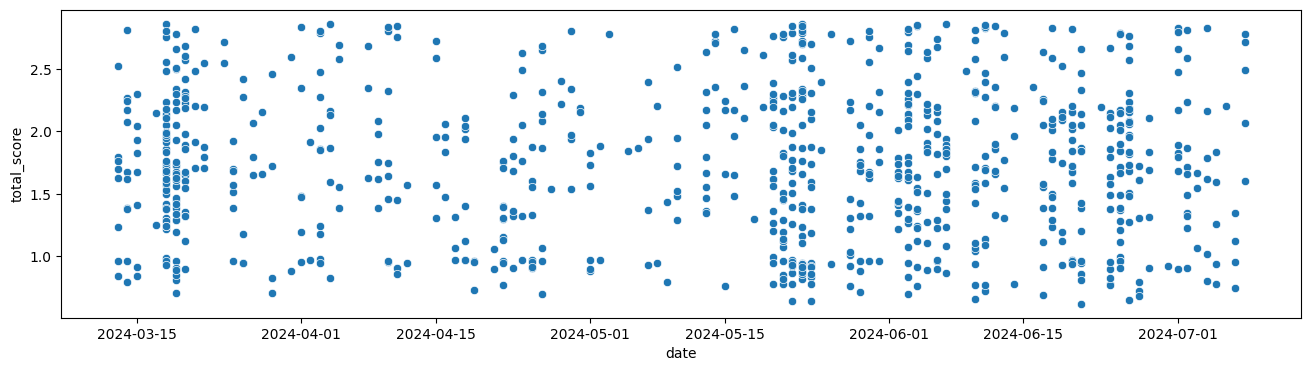

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,4))
sns.scatterplot(x=senti_df_fixIndex.index, y=senti_df_fixIndex['total_score'])
plt.show()

# 주가 데이터 리스케일링

In [18]:
import pandas as pd
import yfinance as yf
nvda = yf.Ticker('NVDA') # 야후 파이낸스에서 종목코드로 해당 주식 인스턴스 가져오기
ts_df = nvda.history(period = 'max')[['Close','Volume']] # 주식 인스턴스에 history 함수로 종가와 거래량 dataframe으로 불러옴.
display(ts_df.head()) #출력
print(ts_df.isna().sum()) #결측치 확인

,Close,Volume
Date,,
1999-01-22 00:00:00-05:00,0.037621,2714688000
1999-01-25 00:00:00-05:00,0.041562,510480000
1999-01-26 00:00:00-05:00,0.038337,343200000
1999-01-27 00:00:00-05:00,0.038218,244368000
1999-01-28 00:00:00-05:00,0.038098,227520000


Close     0
Volume    0
dtype: int64
